/Users/jasonsmith/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jasonsmith/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


           Ball      B      P  Combined   Drop
0    Patriots 1  11.50  11.80    11.650  0.850
1    Patriots 2  10.85  11.20    11.025  1.475
2    Patriots 3  11.15  11.50    11.325  1.175
3    Patriots 4  10.70  11.00    10.850  1.650
4    Patriots 5  11.10  11.45    11.275  1.225
5    Patriots 6  11.60  11.95    11.775  0.725
6    Patriots 7  11.85  12.30    12.075  0.425
7    Patriots 8  11.10  11.55    11.325  1.175
8    Patriots 9  10.95  11.35    11.150  1.350
9   Patriots 10  10.50  10.90    10.700  1.800
10  Patriots 11  10.90  11.35    11.125  1.375
       Ball      B      P  Combined   Drop
11  Colts 1  12.70  12.35    12.525  0.475
12  Colts 2  12.75  12.30    12.525  0.475
13  Colts 3  12.50  12.95    12.725  0.275
14  Colts 4  12.55  12.15    12.350  0.650
295
Observed Statistic: 0.733522727272728
------------------------
P-Value: 0.0295


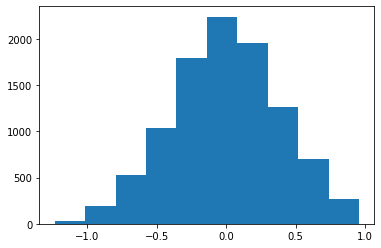

In [21]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

row_labels = range(15)
col_label = ["Ball"]
rows = [["Patriots " +str(i+1)] for i in range(11)]
for i in range(4):
    rows.append(["Colts "+str(i+1)])

fb = pd.DataFrame(rows, columns = ["Ball"])
fb["B"]=[11.5, 10.85, 11.15, 10.7, 11.1, 11.6, 11.85, 11.1, 10.95, 10.5, 10.9, 12.7, \
                12.75, 12.5, 12.55]

fb["P"]=[11.8, 11.2, 11.5, 11, 11.45, 11.95, 12.3, 11.55, 11.35, 10.9, 11.35, 12.35, \
        12.3, 12.95, 12.15]

fb["Combined"] = [(fb["B"][i]+fb["P"][i])/2 for i in range(15)]

def compute_drop(team, value):
    if team=="Patriots":
        return 12.5-value
    else:
        return 13.0-value
    

Patriots = fb.iloc[0:11]
Patriots["Drop"]=Patriots.iloc[:, 3:4].apply(lambda x: compute_drop("Patriots", x))

print(Patriots)

Colts = fb.iloc[11:15]
Colts["Drop"]=Colts.iloc[:, 3:4].apply(lambda x: compute_drop("Colts", x))
print(Colts)

observed_statistic = Patriots.Drop.mean()-Colts.Drop.mean()

#H_0: The Patriot's Drops are like a random sample of 11 of all 15 drops.
#H_a: The Patriot's Drops are too large to be the result of chance.

repititions=10000
sim_stats=[]

for i in range(repititions):
    sample = fb.sample(15, replace=False)
    sample_patriots = sample.iloc[0:11, 3:4]
    sample_colts = sample.iloc[11:15, 3:4]
    sample_statistic = sample_patriots["Combined"].mean()-sample_colts["Combined"].mean()
    sim_stats.append(sample_statistic)
    

pv = np.array(sim_stats)
P_value = len(pv[pv>=observed_statistic])/repititions
print(len(pv[pv>=observed_statistic]))

print("Observed Statistic: "+str(observed_statistic))
print("------------------------")
print("P-Value: "+ str(P_value))

plt.hist(sim_stats, bins=10)
plt.show()
